In [1]:
import pandas as pd

df = pd.read_csv('../Data/SMTO_2015/SMTO_2015_Complete_Input.csv')
df.head()

,Campus,Level,Status,Mode_Actual,Gender,Licence,Work,Age,HomeZone,Family,...,Domestic.OC,Admission_Avg.SG,Admission_Avg.SC,Admission_Avg.MI,Admission_Avg.YK,Admission_Avg.YG,Admission_Avg.RY,Admission_Avg.OC,Exp_Segment,Exp_Level
0,Scarborough (UTSC),UG,FT,Transit Bus,Female,0,Unknown,20,261,1,...,0.8998,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.944738,0.944738
1,Downtown Toronto (St. George),Grad,FT,Walk,Female,1,Unknown,25,71,0,...,0.6786,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.986085,0.986085
2,Downtown Toronto (St. George),UG,FT,Transit Bus,Female,1,Unknown,23,3714,1,...,0.8998,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.919270,0.919270
3,Downtown Toronto (St. George),UG,FT,Walk,Male,1,Unknown,20,74,0,...,0.8998,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.919270,0.919270
4,Downtown Toronto (St. George),Grad,FT,Walk,Male,1,Unknown,27,71,0,...,0.6786,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.986085,0.986085


In [2]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
y = df['School_Codes']

In [13]:
full_zones_df = pd.read_csv('../Data/Full_Zones_Dists.csv')

def run_model(x_train, x_test, colname):
    """
    Run model called name given input x_train
    on full zones data x_test
    and send model predictions to full_zones_df
    column called colname.
    """
    rf.fit(x_train, y)    
    full_zones_df[colname] = rf.predict(x_test)
    probs = rf.predict_proba(x_test)
    print("Results for " + colname + " model:")
    print(full_zones_df[colname].value_counts())
    print(probs)
    print()
    
    return probs

In [15]:
probs_HZ = run_model(df['HomeZone'].values.reshape(-1, 1), full_zones_df['Origin'].values.reshape(-1, 1), "HZ")
probs_dist = run_model(df.iloc[:, 17:24], full_zones_df.iloc[:, 1:8], "Dists")

Results for HZ model:
SG    825
YK    699
RY    465
MI    199
SC    137
OC     53
YG     14
Name: HZ, dtype: int64
[[0.         0.         0.60813889 ... 0.05       0.         0.        ]
 [0.         0.         0.60813889 ... 0.05       0.         0.        ]
 [0.         0.         0.60813889 ... 0.05       0.         0.        ]
 ...
 [0.         0.         0.         ... 0.09       0.         0.91      ]
 [0.         0.         0.         ... 0.09       0.         0.91      ]
 [0.         0.         0.         ... 0.09       0.         0.91      ]]

Results for Dists model:
SG    844
YK    673
RY    456
MI    207
SC    144
OC     45
YG     23
Name: Dists, dtype: int64
[[0.00000000e+00 7.69230769e-04 6.84492776e-01 ... 1.48717949e-02
  7.60683761e-03 2.64957265e-03]
 [9.72992694e-03 4.48559575e-02 3.78595548e-01 ... 3.04891311e-01
  6.10544644e-02 1.13656876e-01]
 [9.00878749e-03 6.09538205e-02 3.78363983e-01 ... 3.10722157e-01
  3.78356754e-02 1.66924108e-01]
 ...
 [5.83333333e-02 

In [38]:
full_zones_df

,Origin,Dist.SG,Dist.SC,Dist.MI,Dist.YK,Dist.YG,Dist.RY,Dist.OC,HZ,Dists
0,1,8.233101,17.76699,27.435870,24.33012,11.45088,6.407150,7.172228,RY,RY
1,2,7.629588,18.88647,26.702720,23.72661,11.60740,5.773918,6.420753,RY,RY
2,3,6.983658,18.75429,26.056790,23.08068,10.79940,5.127988,5.774823,RY,RY
3,4,6.303398,19.60028,25.345930,22.45217,11.28469,4.417128,5.063963,RY,RY
4,5,5.788057,20.27234,24.830590,21.93682,11.30364,3.901787,4.548622,RY,SG
5,6,6.541063,20.54051,25.583600,22.68983,11.57180,4.654793,5.301628,SG,RY
6,7,7.402354,21.28565,26.441880,23.55112,12.43309,5.516084,6.162919,SG,RY
7,8,7.723674,20.48058,26.763200,23.87244,12.16499,5.837404,6.484239,SG,RY
8,9,6.274250,22.89256,25.022400,22.42302,14.04000,4.387980,5.034815,SG,SG
9,10,5.522103,21.88488,24.270250,21.67087,13.03231,3.635833,4.282668,SG,SG


In [39]:
import numpy as np
df_HZ = pd.DataFrame(data=probs_HZ, columns = list(rf.classes_))
df_dist = pd.DataFrame(data=probs_dist, columns = list(rf.classes_))

df_HZ['Origin'] = full_zones_df['Origin']
df_dist['Origin'] = full_zones_df['Origin']

In [41]:
df_HZ.tail()

,MI,OC,RY,SC,SG,YG,YK,Origin
2387,0.0,0.0,0.0,0.0,0.09,0.0,0.91,8029
2388,0.0,0.0,0.0,0.0,0.09,0.0,0.91,8030
2389,0.0,0.0,0.0,0.0,0.09,0.0,0.91,8031
2390,0.0,0.0,0.0,0.0,0.09,0.0,0.91,8032
2391,0.0,0.0,0.0,0.0,0.09,0.0,0.91,8033


In [42]:
df_dist.tail()

,MI,OC,RY,SC,SG,YG,YK,Origin
2387,0.093861,0.124375,0.031667,0.000000,0.522764,0.036292,0.191042,8029
2388,0.028444,0.047917,0.064500,0.179833,0.293889,0.008750,0.376667,8030
2389,0.058333,0.027667,0.222333,0.010000,0.254429,0.009762,0.417476,8031
2390,0.004583,0.020000,0.081000,0.000000,0.824417,0.020000,0.050000,8032
2391,0.000000,0.031250,0.014667,0.000000,0.209667,0.003750,0.740667,8033


In [45]:
df_HZ.to_csv('../ArcGIS/Map Projects/AverageStudentPopulation - Needed Files/RF_Probabilities_HZ.csv', index = False)
df_dist.to_csv('../ArcGIS/Map Projects/AverageStudentPopulation - Needed Files/RF_Probabilities_dist.csv', index = False)

In [27]:
full_zones_df

,Origin,Dist.SG,Dist.SC,Dist.MI,Dist.YK,Dist.YG,Dist.RY,Dist.OC,HZ,Dists
0,1,8.233101,17.76699,27.435870,24.33012,11.45088,6.407150,7.172228,RY,RY
1,2,7.629588,18.88647,26.702720,23.72661,11.60740,5.773918,6.420753,RY,RY
2,3,6.983658,18.75429,26.056790,23.08068,10.79940,5.127988,5.774823,RY,RY
3,4,6.303398,19.60028,25.345930,22.45217,11.28469,4.417128,5.063963,RY,RY
4,5,5.788057,20.27234,24.830590,21.93682,11.30364,3.901787,4.548622,RY,SG
5,6,6.541063,20.54051,25.583600,22.68983,11.57180,4.654793,5.301628,SG,RY
6,7,7.402354,21.28565,26.441880,23.55112,12.43309,5.516084,6.162919,SG,RY
7,8,7.723674,20.48058,26.763200,23.87244,12.16499,5.837404,6.484239,SG,RY
8,9,6.274250,22.89256,25.022400,22.42302,14.04000,4.387980,5.034815,SG,SG
9,10,5.522103,21.88488,24.270250,21.67087,13.03231,3.635833,4.282668,SG,SG


In [6]:
(full_zones_df['HZ'] == full_zones_df['Dists']).value_counts(normalize=True)

True     0.674749
False    0.325251
dtype: float64

In [12]:
temp = full_zones_df[full_zones_df['Origin'] < 4000]
(temp['HZ'] == temp['Dists']).value_counts(normalize=True)

True     0.729099
False    0.270901
dtype: float64

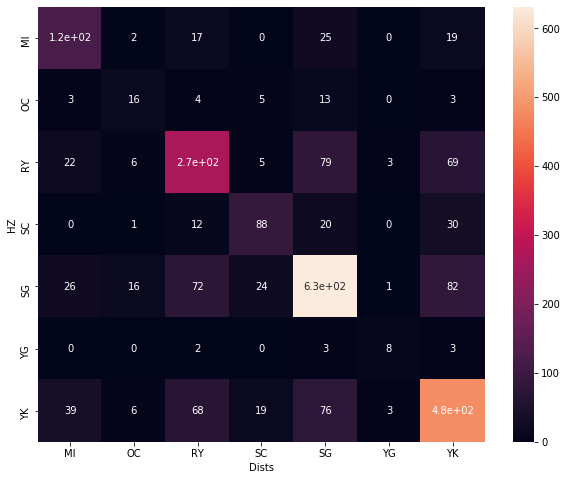

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sn.heatmap(pd.crosstab(full_zones_df['HZ'], full_zones_df['Dists']), annot=True)
plt.show()

In [8]:
full_zones_df.to_csv('../Data/SMTO_2015/RF_Predictions.csv', index=False)